#  Проект "Анализ рынка игровых приставок"

<b>Данные:</b><br> 
Нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

<b>Описание данных:</b><br> 

- "Name" — название игры,
- "Platform" — платформа,
- "Year_of_Release" — год выпуска,
- "Genre" — жанр игры,
- "NA_sales" — продажи в Северной Америке (миллионы проданных копий),
- "EU_sales" — продажи в Европе (миллионы проданных копий),
- "JP_sales" — продажи в Японии (миллионы проданных копий),
- "Other_sales" — продажи в других странах (миллионы проданных копий),
- "Critic_Score" — оценка критиков (максимум 100),
- "User_Score" — оценка пользователей (макRating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

<b>Цель:</b><br> Проанализовать имеющиеся данные и выявить определяющие успешность игры закономерности, которые позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### 1.Подготовка данных

Сделаем код "красивым", установив jupyter-black:

In [6]:
!pip install jupyter-black

In [7]:
import jupyter_black

jupyter_black.load()

In [8]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as pl
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)

In [9]:
try:
    df = pd.read_csv("Desktop/Аналитик данных/Проекты/Game_platforms_it1.ipynb")
except:
    df = pd.read_csv("https://code.s3.yandex.net/datasets/games.csv")

In [10]:
df.columns = map(str.lower, df.columns)

Первичный осмотр данных,выводы

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Поиск пропусков в данных

In [14]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [15]:
display(df[df["name"].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


У нас 2 строки с пропусками в имени и жанре, удалим их

In [17]:
df = df.dropna(subset=["name"])

In [18]:
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Заменим тип данных целочисленного рейтинга критиков на Int

In [20]:
df["year_of_release"] = df["year_of_release"].astype("Int64")

In [21]:
df["critic_score"] = df["critic_score"].astype("Int64")

In [22]:
df["year_of_release"].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

Заменим тип данных в столбце user_score с object на float и заменим рейтинг "TBD" на пропуски. Пропуски в рейтингах мы не можем заменить ни средним, ни медианным значениями, так как это сугубо индивидуальный показатель.

In [24]:
df["user_score"] = df["user_score"].replace(r"tbd", np.nan, regex=True)

In [25]:
df["user_score"] = df["user_score"].astype("float")

Заполним пропуски в столбце 'rating' на «NR» ( «No Rating» )

In [27]:
df["rating"] = df["rating"].fillna("NR")

In [28]:
df["platform"] = df["platform"].str.lower()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.6+ MB


In [30]:
df["rating"].value_counts()

rating
NR      6764
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: count, dtype: int64

Создадим столбец с суммарными продажами

In [32]:
df["total_sales"] = df["na_sales"] + df["eu_sales"] + df["jp_sales"] + df["other_sales"]

Проверим явные дубликаты

In [34]:
df.duplicated().sum()

0

В процессе предобработки данных были произведены следующие действия:
* изменены типы данных в столбцах: "year_of_release", "critic_score", "rating"
* в столбце user_score изменен рейтинг "TBD" на пропуски, так как пропуски в рейтингах невозмодно заменить ни средним, ни медианным значениями, в связи с тем, что это сугубо индивидуальный показатель.
* заполнены пропуски в столбце 'rating' на «NR» ( «No Rating» )
* все названия столбцов приведены к нижнему регистру
* проверены явные дубликаты
* удалены 2 строки с пропусками в имени и жанре.

 
  Результат: данные очищены, отформатированы и готовы к объективному анализу.

### 2.Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы.

Text(0, 0.5, 'Количество проданных копий')

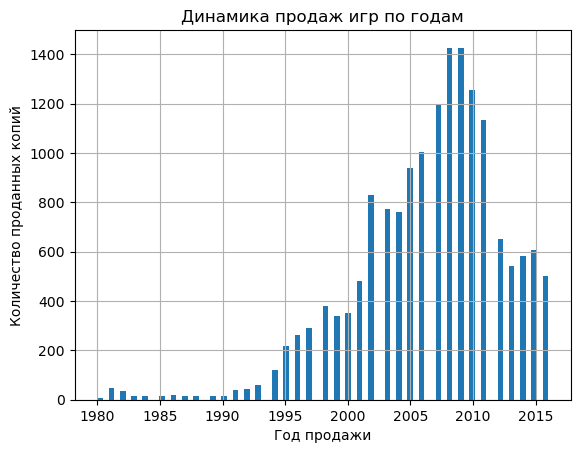

In [38]:
df["year_of_release"].hist(bins=80)
pl.title("Динамика продаж игр по годам")
pl.xlabel("Год продажи")
pl.ylabel("Количество проданных копий")

По имеющимся данным видим нарастание производства игр в плоть до 2008 года. Пик релизов пришелся на 2008 и 2009 годы. Далее видим резкое падение,особенно в 2011 году. Последние 5 лет производство сохраняется на уровне чуть выше 2001 года. Для первичного анализа возьмем последние 12 лет с 2002 года, когда игровая индустрия уже была значительно развита и близка к ее существущему уровню популярности.

In [40]:
platforms = df.query("year_of_release>=2002").pivot_table(
    index="platform", values="total_sales", aggfunc=["count", "sum"]
)
platforms.columns = ["count_games", "total_sales"]

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [42]:
platforms_top = platforms.query("total_sales>200").sort_values(
    by="total_sales", ascending=False
)
platforms_top

,count_games,total_sales
platform,,
ps2,1860,1027.96
x360,1232,961.24
ps3,1306,931.34
wii,1286,891.18
ds,2120,802.76
ps4,392,314.14
psp,1193,289.53
3ds,512,257.81
gba,703,251.28


Несмотря на то, что платформа DS выпустила больше всего игр, лидирует по суммарным продажам PS2, меньше всех игр выпустила PS4, но она в середине нашего рейтинга

In [44]:
platforms_top["platform"] = platforms_top.index
platforms_top = platforms_top.reset_index(level=0, drop=True)
platforms_top

,count_games,total_sales,platform
0,1860,1027.96,ps2
1,1232,961.24,x360
2,1306,931.34,ps3
3,1286,891.18,wii
4,2120,802.76,ds
5,392,314.14,ps4
6,1193,289.53,psp
7,512,257.81,3ds
8,703,251.28,gba
9,769,228.32,xb


Лидеры по продажам:

In [46]:
platforms_top["platform"].unique()

array(['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps4', 'psp', '3ds', 'gba',
       'xb'], dtype=object)

Лидерами по продажам являются платформы 'ps2', 'x360', 'ps3', 'wii', 'ds', 'ps4', 'psp', '3ds', 'gba',  'xb'

In [48]:
df_platforms_top = df.query(
    "platform in ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps4', 'psp', '3ds', 'gba','xb']"
)
df_platforms_top.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77


<Axes: xlabel='year_of_release', ylabel='platform'>

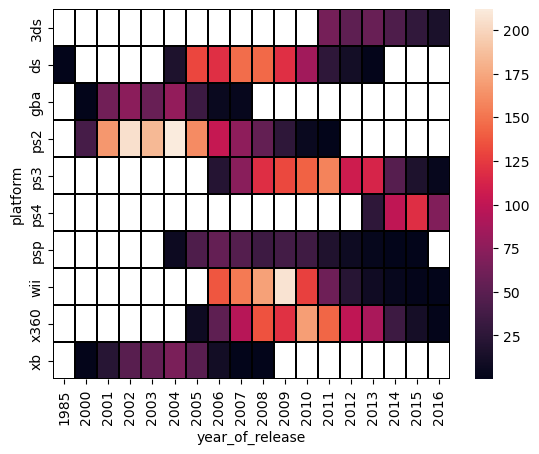

In [49]:
platform_year = df_platforms_top.pivot_table(
    index="platform", columns="year_of_release", values="total_sales", aggfunc="sum"
)
sns.heatmap(data=platform_year, linewidths=0.3, linecolor="black")

In [50]:
platform_year = df_platforms_top.pivot_table(
    index="platform",
    values="year_of_release",
    aggfunc=["min", "max"],
)

In [51]:
platform_year.columns = ["min", "max"]
platform_year["mean"] = platform_year["max"] - platform_year["min"]
platform_year["mean"].mean()

10.4

В среднем платформа живет 10,4 лет, пик продаж приходится на середину жизни со смещением к началу. При выходе новой платформы, продажи прошлой версии начинают падать и в итоге сходят на нет. Это отчетливо видно на продажах PlayStation.

Определим актуальный период как последние 3 года с 2013 года (так мы отсечем пик продаж устаревших платформ)

In [54]:
df = df.query("year_of_release>=2013")

In [55]:
df_platforms = df.pivot_table(
    index="year_of_release",
    columns="platform",
    values="total_sales",
    aggfunc=["sum"],
)
df_platforms

sum                                                         \
platform           3ds    ds     pc     ps3     ps4   psp    psv   wii   wiiu   
year_of_release                                                                 
2013             56.57  1.54  12.38  113.25   25.99  3.14  10.59  8.59  21.65   
2014             43.76   NaN  13.28   47.76  100.00  0.24  11.90  3.75  22.03   
2015             27.78   NaN   8.52   16.82  118.90  0.12   6.25  1.14  16.35   
2016             15.14   NaN   5.25    3.60   69.25   NaN   4.25  0.18   4.60   

                               
platform          x360   xone  
year_of_release                
2013             88.58  18.96  
2014             34.74  54.07  
2015             11.96  60.14  
2016              1.52  26.15

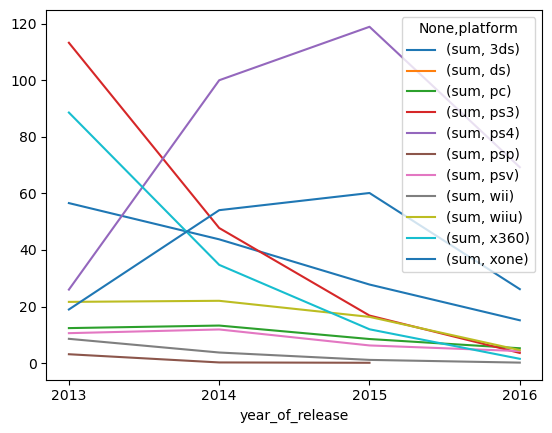

In [56]:
df_platforms.plot()
pl.xticks(range(2013, 2017));

На графике видны две выдающиеся платформы ps4 и xOne, испытывающие падение продаж в 2015 году (за 2016 данные могут быть не полными), но не исчерпавшие свой условный потенциал в 10 лет. Обе они стартовали в 2013 году и имели резкий рост продаж. Данные платформы можно считать потенциально прибыльными для продвижения. 

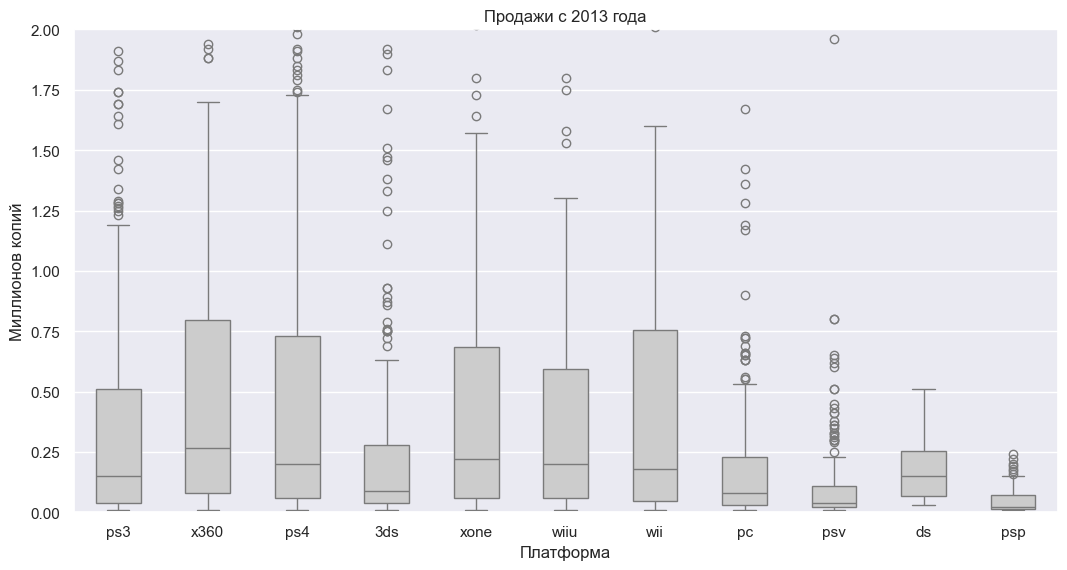

In [58]:
sns.set_theme(rc={"figure.figsize": (12.7, 6.27)})
sns.boxplot(x="platform", y="total_sales", data=df, width=0.5, color=".8")

pl.title("Продажи с 2013 года")
pl.ylabel("Миллионов копий")
pl.xlabel("Платформа")
pl.ylim(0, 2)
pl.show()

В лидерах продаж находится Xbox360 (x360) - платформа,находящаяся в продаже уже 11 лет,но чья популярность идет на убыль. Далее следует самая свежая PS4, выпущенная в продажу в 2013 году , и Nintendo Wii, но эта площадка на рынке находится уже давно (с 2006 года) и значительно теряет в популярности. Самыми плохо продаваемыми являются устарешие платформы, на смену которым пришли обновленные версии.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

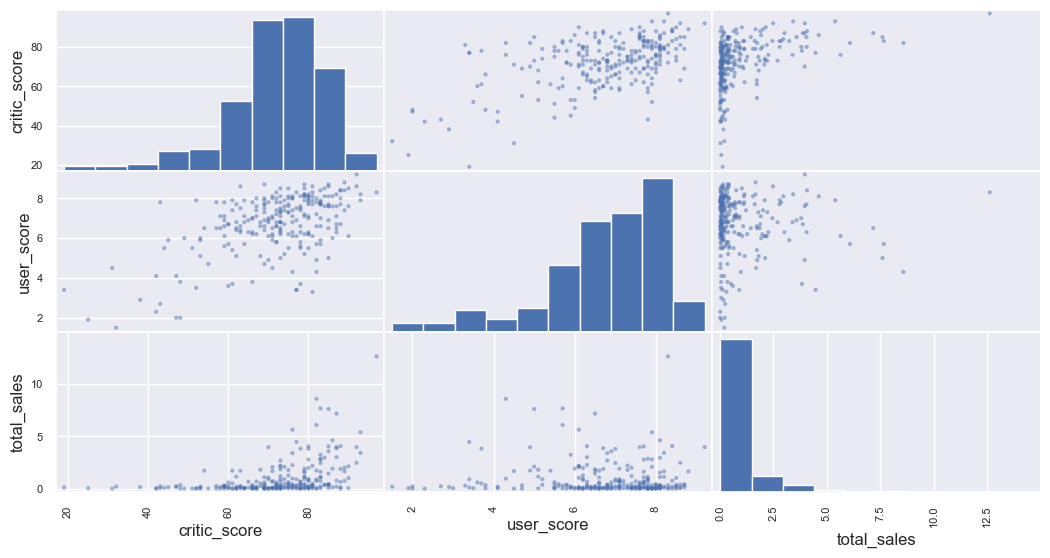

In [61]:
df_ps4 = df[df["platform"] == "ps4"]
df_ps4 = df_ps4[["critic_score", "user_score", "total_sales"]]
pd.plotting.scatter_matrix(df_ps4);

In [62]:
print(df_ps4.corr())

              critic_score  user_score  total_sales
critic_score      1.000000    0.557654     0.406568
user_score        0.557654    1.000000    -0.031957
total_sales       0.406568   -0.031957     1.000000


Платформа PS4.

Корреляция продаж с отзывами пользователей не прослеживается, корреляция с отзывами критиков прослеживается прямая,но достаточно слабая. На матрице заметно, что чем количество отзывов критиков имеет прямую взаимосвязь с количеством отзывов пользователей.

In [64]:
df_scores = df.pivot_table(
    index="platform",
    values=["user_score", "critic_score", "total_sales"],
    aggfunc=["sum"],
)
df_scores.columns = ["critic_score", "total_sales", "user_score"]
# df_scores["platform"] = df_scores.index
df_scores = df_scores.reset_index()
print(df_scores)

   platform  critic_score  total_sales  user_score
0       3ds          4852       143.25       558.1
1        ds             0         1.54         4.8
2        pc         11257        39.43       971.8
3       ps3          8494       181.43      1180.8
4       ps4         18167       314.14      1734.3
5       psp            74         3.50        11.7
6       psv          5516        32.99       745.2
7       wii             0        13.66        36.8
8      wiiu          5015        64.63       561.4
9      x360          5608       136.80       857.0
10     xone         12392       159.32      1186.9


In [65]:
df_scores["platform"].unique()

array(['3ds', 'ds', 'pc', 'ps3', 'ps4', 'psp', 'psv', 'wii', 'wiiu',
       'x360', 'xone'], dtype=object)

3ds :


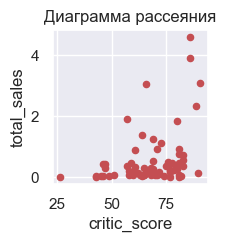

ds :


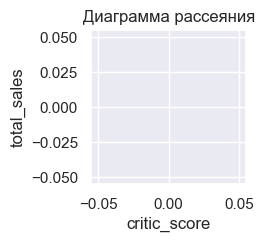

pc :


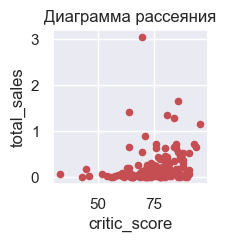

ps3 :


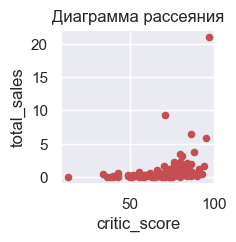

ps4 :


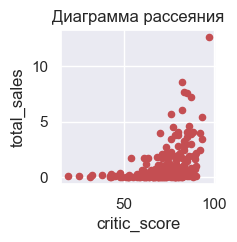

psp :


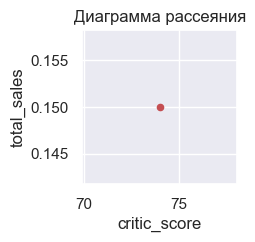

psv :


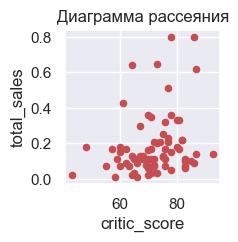

wii :


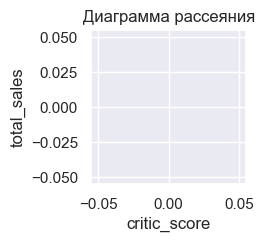

wiiu :


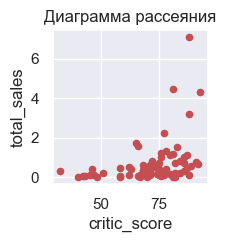

x360 :


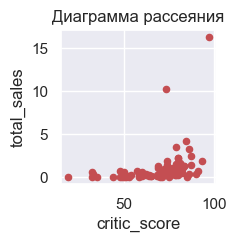

xone :


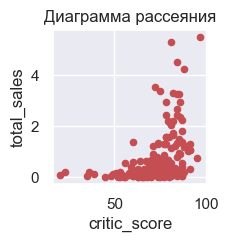

In [66]:
list_platform = [
    "3ds",
    "ds",
    "pc",
    "ps3",
    "ps4",
    "psp",
    "psv",
    "wii",
    "wiiu",
    "x360",
    "xone",
]
for platform in list_platform:
    df[df["platform"] == platform].plot(
        x="critic_score",
        y="total_sales",
        kind="scatter",
        grid=True,
        figsize=(2, 2),
        color="r",
    )
    pl.title("Диаграмма рассеяния")
    print(platform, ":")
    pl.show()

3ds :


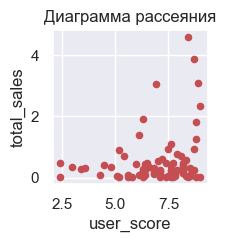

ds :


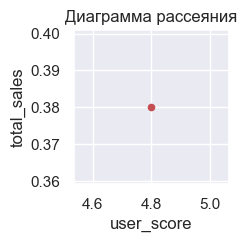

pc :


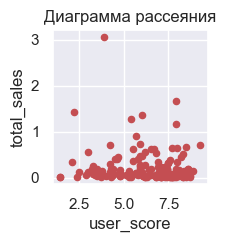

ps3 :


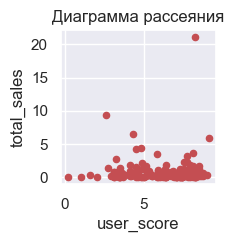

ps4 :


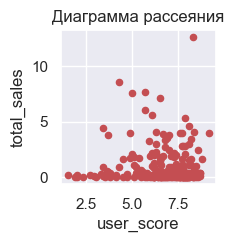

psp :


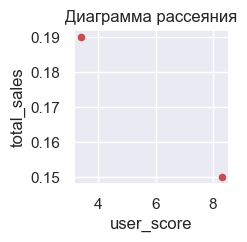

psv :


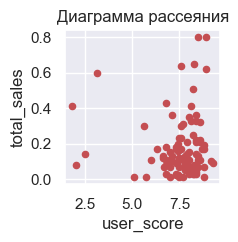

wii :


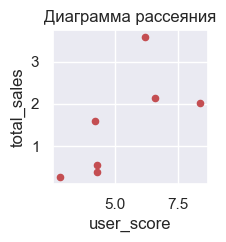

wiiu :


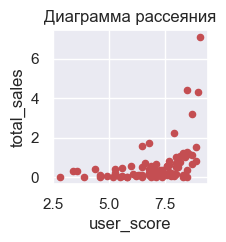

x360 :


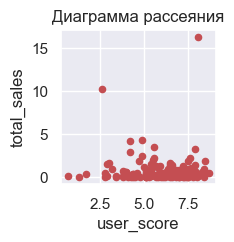

xone :


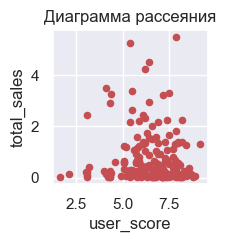

In [67]:
for platform in list_platform:
    df[df["platform"] == platform].plot(
        x="user_score",
        y="total_sales",
        kind="scatter",
        grid=True,
        figsize=(2, 2),
        color="r",
    )
    pl.title("Диаграмма рассеяния")
    print(platform, ":")
    pl.show()

Выборочно проверим корреляцию на одной из наиболее продаваемых площадок xOne:

In [69]:
df_xone = df[df["platform"] == "ps4"]
df_xone = df_ps4[["critic_score", "user_score", "total_sales"]]
print(df_xone.corr())

              critic_score  user_score  total_sales
critic_score      1.000000    0.557654     0.406568
user_score        0.557654    1.000000    -0.031957
total_sales       0.406568   -0.031957     1.000000


Ситуация с PS4 подтверждается: по отзывам критиков прослеживается прямая, но очень слабая корреляция, по отзывам пользователей она отсутсвует.

#### Посмотрим на общее распределение игр по жанрам:

In [72]:
df.groupby("genre")["total_sales"].sum().sort_values(ascending=False)

genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: total_sales, dtype: float64

Самыми популярными жанрами по количеству проданных копий со значительным отрывом являются активные игры, такие как Action,Shooter, чуть менее популярны Role-Playing и Sports. Отчетливо выделяются самые непопулярные игры - это спокойные игры Strategy и 
Puzzle,которые скорее больше подходят для игр на смартфоне где-нибудь в транспорте или ПК.

In [74]:
df.pivot_table(
    index="genre", values="total_sales", aggfunc=["mean", "median"]
).style.background_gradient(cmap="Reds", axis=None)

,mean,median
,total_sales,total_sales
genre,,
Action,0.420196,0.110000
Adventure,0.096490,0.030000
Fighting,0.441375,0.125000
Misc,0.405290,0.100000
Platform,0.576081,0.225000
Puzzle,0.186471,0.060000
Racing,0.469294,0.120000
Role-Playing,0.499623,0.125000


Самым прибыльным жанром со значительным отрывом можно считать Шутер, лидирующий и по среднему, и по медианному значениям.

### Шаг 4. Портреты пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5)
Самые популярные жанры (топ-5)
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [78]:
df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,ps3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,x360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,ps4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NR,14.63


#### Северная Америка (NA)

In [80]:
df_na = df.groupby("platform")["na_sales"].agg("sum").sort_values(ascending=False)
df_na = df_na.reset_index()
df_na.loc["Total"] = df_na.sum(numeric_only=True)

df_na.columns = ["platform", "sum"]
df_na["sum"] = df_na["sum"].astype("float")
df_na["ratio"] = df_na["sum"] / df_na.loc["Total", "sum"]
df_na["ratio"] = df_na["ratio"].transform(lambda x: "{:,.0%}".format(x))
print(df_na)

      platform     sum ratio
0          ps4  108.74   25%
1         xone   93.12   21%
2         x360   81.66   19%
3          ps3   63.50   15%
4          3ds   38.20    9%
5         wiiu   29.21    7%
6           pc   11.11    3%
7          wii    6.56    1%
8          psv    5.04    1%
9           ds    0.57    0%
10         psp    0.00    0%
Total      NaN  437.71  100%


Топ-5 лидеров: ps4, xone, x360, ps3, 3ds

In [82]:
df_na = df.groupby("genre")["na_sales"].agg("sum").sort_values(ascending=False)
df_na = df_na.reset_index()
df_na.loc["Total"] = df_na.sum(numeric_only=True)

df_na.columns = ["genre", "sum"]
df_na["sum"] = df_na["sum"].astype("float")
df_na["ratio"] = df_na["sum"] / df_na.loc["Total", "sum"]
df_na["ratio"] = df_na["ratio"].transform(lambda x: "{:,.0%}".format(x))
print(df_na)

              genre     sum ratio
0            Action  126.05   29%
1           Shooter  109.74   25%
2            Sports   65.27   15%
3      Role-Playing   46.40   11%
4              Misc   27.49    6%
5          Platform   18.14    4%
6          Fighting   15.55    4%
7            Racing   12.96    3%
8         Adventure    7.14    2%
9        Simulation    4.86    1%
10         Strategy    3.28    1%
11           Puzzle    0.83    0%
Total           NaN  437.71  100%


Топ-5 жанров: Action, Shooter, Sports, Role-Playing, Misc

#### Европа (EU)

In [85]:
df_eu = df.groupby("platform")["eu_sales"].agg("sum").sort_values(ascending=False)
df_eu = df_eu.reset_index()
df_eu.loc["Total"] = df_eu.sum(numeric_only=True)
df_eu.columns = ["platform", "sum"]
df_eu["sum"] = df_eu["sum"].astype("float")
df_eu["ratio"] = df_eu["sum"] / df_eu.loc["Total", "sum"]
df_eu["ratio"] = df_eu["ratio"].transform(lambda x: "{:,.0%}".format(x))
print(df_eu)

      platform     sum ratio
0          ps4  141.09   36%
1          ps3   67.81   17%
2         xone   51.59   13%
3         x360   42.52   11%
4          3ds   30.96    8%
5           pc   25.36    6%
6         wiiu   19.85    5%
7          psv    6.10    2%
8          wii    5.93    2%
9           ds    0.85    0%
10         psp    0.17    0%
Total      NaN  392.23  100%


Топ-5 лидеров: ps4, ps3, xone, x360, 3ds. Суммарные продажи в Европе в целом ниже,чем в СА

In [87]:
df_eu = df.groupby("genre")["eu_sales"].agg("sum").sort_values(ascending=False)
df_eu = df_eu.reset_index()
df_eu.loc["Total"] = df_eu.sum(numeric_only=True)
df_eu.columns = ["genre", "sum"]
df_eu["sum"] = df_eu["sum"].astype("float")
df_eu["ratio"] = df_eu["sum"] / df_eu.loc["Total", "sum"]
df_eu["ratio"] = df_eu["ratio"].transform(lambda x: "{:,.0%}".format(x))
print(df_eu)

              genre     sum ratio
0            Action  118.13   30%
1           Shooter   87.86   22%
2            Sports   60.52   15%
3      Role-Playing   36.97    9%
4            Racing   20.19    5%
5              Misc   20.04    5%
6          Platform   15.58    4%
7        Simulation   10.92    3%
8          Fighting    8.55    2%
9         Adventure    8.25    2%
10         Strategy    4.22    1%
11           Puzzle    1.00    0%
Total           NaN  392.23  100%


Топ-5 жанров: Action,Shooter,Sports,Role-Playing,Racing 

#### Япония (JP)

In [90]:
df_jp = df.groupby("platform")["jp_sales"].agg("sum").sort_values(ascending=False)
df_jp = df_jp.reset_index()
df_jp.loc["Total"] = df_jp.sum(numeric_only=True)
df_jp.columns = ["platform", "sum"]
df_jp["sum"] = df_jp["sum"].astype("float")
df_jp["ratio"] = df_jp["sum"] / df_jp.loc["Total", "sum"]
df_jp["ratio"] = df_jp["ratio"].transform(lambda x: "{:,.0%}".format(x))
print(df_jp)

      platform     sum ratio
0          3ds   67.81   48%
1          ps3   23.35   17%
2          psv   18.59   13%
3          ps4   15.96   11%
4         wiiu   10.88    8%
5          psp    3.29    2%
6         x360    0.51    0%
7         xone    0.34    0%
8          wii    0.05    0%
9           ds    0.00    0%
10          pc    0.00    0%
Total      NaN  140.78  100%


Топ-5 платформ Японии:'3ds', 'ps3', 'psv', 'ps4', 'wiiu'

In [92]:
df_jp = df.groupby("genre")["jp_sales"].agg("sum").sort_values(ascending=False)
df_jp = df_jp.reset_index()
df_jp.loc["Total"] = df_jp.sum(numeric_only=True)
df_jp.columns = ["genre", "sum"]
df_jp["sum"] = df_jp["sum"].astype("float")
df_jp["ratio"] = df_jp["sum"] / df_jp.loc["Total", "sum"]
df_jp["ratio"] = df_jp["ratio"].transform(lambda x: "{:,.0%}".format(x))
print(df_jp)

              genre     sum ratio
0      Role-Playing   51.04   36%
1            Action   40.49   29%
2              Misc    9.20    7%
3          Fighting    7.65    5%
4           Shooter    6.61    5%
5         Adventure    5.82    4%
6            Sports    5.41    4%
7          Platform    4.79    3%
8        Simulation    4.52    3%
9            Racing    2.30    2%
10         Strategy    1.77    1%
11           Puzzle    1.18    1%
Total           NaN  140.78  100%


Топ-5 жанров: Role-Playing, 
Action, 
Misc, 
Fighting,
Shooter

In [94]:
df2 = pd.merge(df_na, df_eu, left_index=True, right_index=True, suffixes=("_na", "_eu"))
df3 = pd.merge(
    df2, df_jp, left_index=True, right_index=True, suffixes=("_na", "_eu", "_jp")
)
df3

,genre_na,sum_na,ratio_na,genre_eu,sum_eu,ratio_eu,genre,sum,ratio
0,Action,126.05,29%,Action,118.13,30%,Role-Playing,51.04,36%
1,Shooter,109.74,25%,Shooter,87.86,22%,Action,40.49,29%
2,Sports,65.27,15%,Sports,60.52,15%,Misc,9.20,7%
3,Role-Playing,46.40,11%,Role-Playing,36.97,9%,Fighting,7.65,5%
4,Misc,27.49,6%,Racing,20.19,5%,Shooter,6.61,5%
5,Platform,18.14,4%,Misc,20.04,5%,Adventure,5.82,4%
6,Fighting,15.55,4%,Platform,15.58,4%,Sports,5.41,4%
7,Racing,12.96,3%,Simulation,10.92,3%,Platform,4.79,3%
8,Adventure,7.14,2%,Fighting,8.55,2%,Simulation,4.52,3%
9,Simulation,4.86,1%,Adventure,8.25,2%,Racing,2.30,2%


Топ 5 платформ Северной Америки: ps4, xone, x360, ps3, 3ds
Топ 5 платформ Европы: ps4, ps3, xone, x360, 3ds
Топ 5 платформ Японии: '3ds', 'ps3', 'psv', 'ps4', 'wiiu'

Японцы явно не гонятся за топовыми версиями и не спешат обновлять приставки. Наибольшей популярностью у них пользуются приставки фирмы Nintendo (почти половина купленных приставок), в отличие от европейцев и североамериканцев, предпочитающих последнюю версию PlayStation.

Топ-5 жанров Северной Америки: Action, Shooter, Sports, Role-Playing, Misc
Топ-5 жанров Европы: Action,Shooter,Sports,Role-Playing,Racing
Топ-5 жанров Японии: Role-Playing, Actio, Misc, Simulation, Fighting   

Самые непопулярные жанры во всех регионах - Puzzle и Strategy. В сравнении с другими регионами в Европе значительно более популярен жанр Racing и даже входит в их топ-5. В остальном топ-5 европейцев полностью совпадает с американцами: самые популярные жанры: Action, Shooter,в Японии же в явных лидерах: Role-Playing, Action. Предпочтение игр жанра Role-Playing связано в любовью японцев к аниме и производством игр именно этого жанра на его основе. Необходимо учитывать специфику предпочтений японцев при выборе продвигаемых игр.

Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе:

,eu_sales,jp_sales,na_sales
rating,,,
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
NR,78.91,85.05,89.42
T,41.95,20.59,49.79


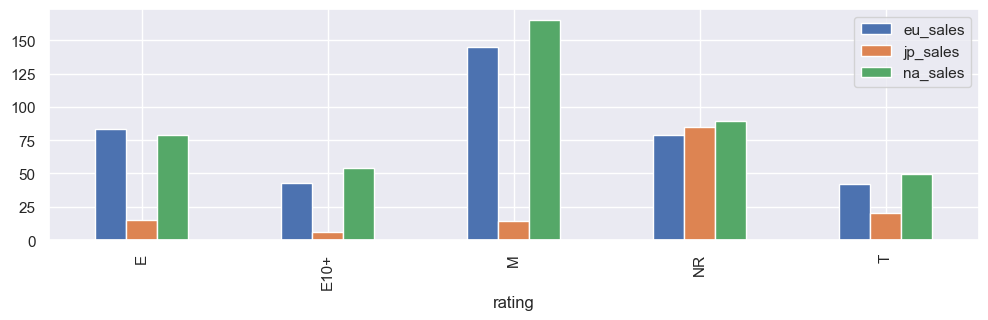

In [99]:
df_rating = df.pivot_table(
    index="rating",
    values=["na_sales", "eu_sales", "jp_sales"],
    aggfunc="sum",
)
df_rating.plot(kind="bar", figsize=(12, 3))
df_rating
# columns="year_of_release",

Rating in na_sales :


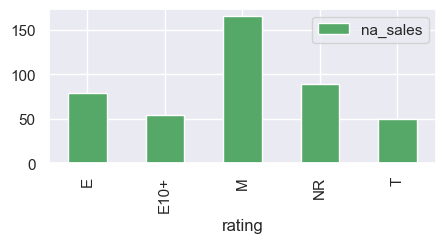

Rating in eu_sales :


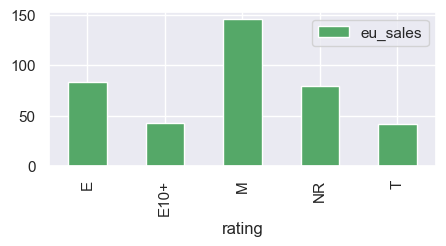

Rating in jp_sales :


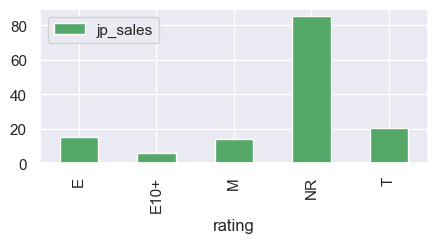

In [100]:
list = ["na_sales", "eu_sales", "jp_sales"]
for c in list:
    df.pivot_table(
        index="rating",
        values=c,
        aggfunc="sum",
    ).plot(kind="bar", figsize=(5, 2), color="g")
    print("Rating in", c, ":")
    pl.show()

«M» («Mature») — «Для взрослых»
«E» («Everyone») — «Для всех»
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
«T» («Teen») — «Подросткам»
Лидирует в целом по продажам Северная Америка, самые популярные игры отнсятся к сегменту "для взрослых",далее идут "Для всех" и примерно наравне "Подросткам" и "10+". Видно,что предпочтения американцев и европейцев совпадают. Кординально отличаются в выборе игря японцы: с большим отрывом лидирует столбец "No rating", это связано с тем, что в Японии действует своя система оценки CERO, отличная от ESRB в Америке и Европе. Ввиду отсутсвия данных,проанализировать данных столбец мы не можем, но по играм, имеющим оценку ESRB видим, что японцы отдают немного большее предпочтения играм для всех и подростковым, здесь не наблюдается явного преобладания игр для взрослых, как у американцев и европейцев.

<b> Портреты пользователя</b><br>
<b>Америка:</b><br> топовая приставка PS4 (да, наибольшие продажи имеет x360, но ее продажи постепенно падают,а PS4 только набирает популярность и скоро ее обгонит), игры жанра Action рейтинга M (для взрослых)
<b>Европа:</b><br> PS4, Action, M "для взрослых". Портрет полностью совпадает с Америкой
<b>Япония:</b><br> Nintendo 3DS, жанр Role-Playing, рейтинг не определен по стандарту ESRB, так как в Японии своя система рейтинга.

### Шаг 5. Итоговый вывод

В ходе работы были проанализированы данные о продажах игр, оценках пользователей и экспертов, жанры и платформы из Северной Америки, Европы и Японии с 1980 по 2016 год.

<b></b> <br>
По имеющимся данным видим нарастание производства игр в плоть до 2008 года. Пик релизов пришелся на 2008 и 2009 годы. Далее видим резкое падение,особенно в 2011 году. Последние 5 лет производство сохраняется на уровне чуть выше 2001 года. Для первичного анализа возьмем последние 12 лет с 2002 года, когда игровая индустрия уже была значительно развита и близка к ее существущему уровню популярности.

<b></b><br>
Лидерами по продажам являются платформы 'ps2', 'x360', 'ps3', 'wii', 'ds', 'ps4', 'psp', '3ds', 'gba', 'xb'. Несмотря на то, что платформа DS выпустила больше всего игр, лидирует по суммарным продажам PS2, меньше всех игр выпустила PS4, но она в середине нашего рейтинга. Это говорит о том, что количество проданных игр не имеет прямой корреляции с полученной выручкой.

<b></b><br>
В среднем платформа живет 10,4 лет, пик продаж приходится на середину жизни со смещением к началу. При выходе новой платформы, продажи прошлой версии начинают падать и в итоге сходят на нет. Это отчетливо видно на продажах PlayStation.

<b></b><br>
При выборочном анализе платформы PS4 выявлено:

Корреляция продаж с отзывами пользователей не прослеживается, что говорит о том, что количество отзывов не влияет на продажи приставок,я, корреляция с отзывами критиков прослеживается прямая,но достаточно слаб, то есть их отзывы имеют слабое влияние на продажи.

<b></b><br>й.
Для выявления наиболее перспективных платформ использовались наиболее актуальные данные с 2013года

<b></b><br>
- Топ 5 платформ Северной Америки: ps4, xone, x360, ps3, 3ds
- Топ 5 платформ Европы: ps4, ps3, xone, x360, 3ds
- Топ 5 платформ Японии: '3ds', 'ps3', 'psv', 'ps4', 'wiiu'


<b></b><br>
Самыми популярными жанрами по количеству проданных копий со значительным отрывом являются активные игры, такие как Action,Shooter, чуть менее популярны Role-Playing и Sports. Отчетливо выделяются самые непопулярные игры - это спокойные игры Strategy и 
Puzzle,которые скорее больше подходят для игр на смартфоне где-нибудь в транспорте или ПК.
Но самым прибыльным жанром со значительным отрывом можно считать Шутер, лидирующий и по среднему, и по медианному значениям выручки.

<b></b><br>
Для более глубокого анализа брались данные с 2002 года, когда игровая индустрия уже была значительно развита и близка к ее существущему уровню популярности.

<b></b><br>
По имеющимся данным видно, что я
Японцы явно не гонятся за топовыми версиями и не спешат обновлять приставки. Наибольшей популярностью у них пользуются приставки фирмы Nintendo (почти половина купленных приставок), в отличие от европейцев и североамериканцев, предпочитающих последние версии Xbox и PlayStatio
n<b></b><br>.

- Топ-5 жанров Северной Америки: Action, Shooter, Sports, Role-Playing, Misc
- Топ-5 жанров Европы: Action,Shooter,Sports,Role-Playing,Racing
- Топ-5 жанров Японии: Role-Playing, Action, Misc, Fighting, Shooter
<b></b><br>

Самые непопулярные жанры во всех регионах - Puzzle и Strategy. В сравнении с другими регионами в Европе значительно более популярен жанр Racing и даже входит в их топ-5. В остальном топ-5 европейцев полностью совпадает с американцами: самые популярные жанры: Action, Shooter,в Японии же в явных лидерах: Role-Playing, Action. Предпочтение игр жанра Role-Playing связано в любовью японцев к аниме и производством игр именно этого жанра на его основе. Необходимо учитывать специфику предпочтений японцев при выборе продвигаемы

<b></b><br>
Лидирует в целом по продажам Северная Америка, самые популярные игры у них отнсятся к сегменту "для взрослых", далее идут "Для всех" и примерно наравне "Подросткам" и "10+". Видно,что предпочтения американцев и европейцев совпадают. Кординально отличаются в выборе игря японцы: с большим отрывом лидирует столбец "No rating", это связано с тем, что в Японии действует своя система оценки CERO, отличная от ESRB в Америке и Европе. Ввиду отсутсвия данных,проанализировать данных столбец мы не можем, но по играм, имеющим оценку ESRB видим, что японцы отдают немного большее предпочтения играм для всех и подростковым, здесь не наблюдается явного преобладания игр для взрослых, как у американцев и европейцев.

<b></b><br>
<b> Портреты пользователя</b><br>
<b>Америка:</b><br> топовая приставка PS4 (да, наибольшие продажи имеет x360, но ее продажи постепенно падают,а PS4 только набирает популярность и скоро ее обгонит), игры жанра Action рейтинга M (для взрослых)
<b></b><br>
<b>Европа:</b><br> PS4, Action, M "для взрослых". Портрет полностью совпадает с Америкой
<b></b><br>
<b>Япония:</b><br> Nintendo 3DS, жанр Role-Playing, рейтинг не определен по стандарту ESRB, так как в Японии своя система рейтинга.